<a href="https://colab.research.google.com/github/hltdev8642/2D-Deformable-body-in-Unity/blob/master/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Install packages__

_If you are using Google Colab, this no longer needs to be done. Otherwise, run this pip command `!pip install yfinance` and `!pip install prophet`. To install [yfinance package](https://pypi.org/project/yfinance/) and [prophet package](https://pypi.org/project/prophet/)._

# Forecasting Stocks from Yahoo Finance with Prophet
This Notebook is the code implementation of the [Prophet any Stock in Seconds](https://medium.com/dropout-analytics/prophet-any-stock-in-seconds-5f9479977aea?sk=9617b7531d148d602b891a81f86e355b) Story from Gumdropsteve's [Introduction to Prophet repository](https://github.com/gumdropsteve/intro_to_prophet/).

If you would like to download alternative datasets for this Story, you can find historical stock prices (6/10/23) in the [Datasets repository](https://github.com/gumdropsteve/datasets/tree/master/stocks).

In [7]:
import yfinance as yf

# tag ticker for berkshire hathaway inc. (b stock)
brk = yf.Ticker('DAL')

# source all time historical data for the ticker
hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-05-03 00:00:00-04:00,19.142962,19.318990,18.086798,18.236422,8052800,0.0,0.0
2007-05-04 00:00:00-04:00,18.702891,18.790905,18.218817,18.465254,5437300,0.0,0.0
2007-05-07 00:00:00-04:00,18.658891,18.738104,17.778755,17.919577,2646300,0.0,0.0
2007-05-08 00:00:00-04:00,17.602726,17.602726,16.986630,17.277075,4166100,0.0,0.0
2007-05-09 00:00:00-04:00,17.382684,17.778746,17.277067,17.417891,7541100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-10 00:00:00-04:00,52.849333,53.048954,52.060834,52.499996,6118900,0.0,0.0
2024-05-13 00:00:00-04:00,52.959999,53.860001,52.799999,52.990002,7137400,0.1,0.0
2024-05-14 00:00:00-04:00,53.430000,53.509998,52.939999,53.060001,5549600,0.0,0.0


In [9]:
import pandas as pd

df = pd.DataFrame()

# create a new dataframe that follows Prophet's ds, y column requirements
df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail(3)

,ds,y
4287,2024-05-14 00:00:00-04:00,53.060001
4288,2024-05-15 00:00:00-04:00,53.259998
4289,2024-05-16 00:00:00-04:00,52.509998


In [10]:
# remove the timezone from the dates (ds) column
df['ds'] = df['ds'].dt.tz_localize(None)

df.tail(3)

,ds,y
4287,2024-05-14,53.060001
4288,2024-05-15,53.259998
4289,2024-05-16,52.509998


In [13]:
from prophet import Prophet

# create a basic Prophet model which does not account for intraday trends
m = Prophet(daily_seasonality=False)

# fit the model to the data
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/1yzva_wb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/uguq6crl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90484', 'data', 'file=/tmp/tmp2q5op9mv/1yzva_wb.json', 'init=/tmp/tmp2q5op9mv/uguq6crl.json', 'output', 'file=/tmp/tmp2q5op9mv/prophet_model5cp05l9w/prophet_model-20240516235711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# define a future time period of 365 days
future = m.make_future_dataframe(365, freq='D')

# create a forecast for the defined future
forecast = m.predict(future)

# display key columns from the last 5 rows of the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4650,2025-05-12,39.649056,32.102722,47.405850
4651,2025-05-13,39.643695,31.549036,46.807428
4652,2025-05-14,39.588485,31.427967,47.203017
4653,2025-05-15,39.556684,31.288542,47.308731
4654,2025-05-16,39.522006,31.568102,47.565033


from matplotlib import pyplot as plt
_df_0['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

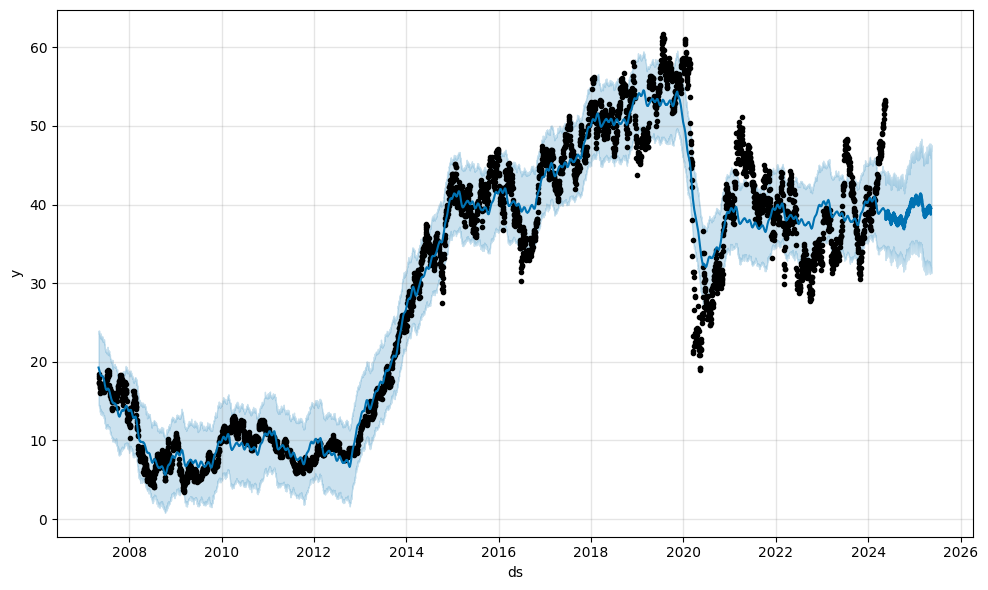

In [15]:
# visualize the forecast
m.plot(forecast);

## Make it a Function
Now that we have an understanding of the steps necessary to predict one stock for the next 365 days, let's make a function that enables us to easily predict any stock for any number of days.

This function will take 4 inputs; 3 of those inputs are the most necessary variables in the process we discovered above, and the fourth gives you the option to display the forcast as a table (as we did above). Those inputs are `ticker`, `periods`, `hist`, `display_chart` and `return_forecast` and their definitions can be found in the function below.

In [16]:
def make_forecast(
    ticker, periods, hist='max',
    return_forecast=False, display_chart=True
                  ):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    > return_forecast
        >> option to return forecast data table
            > default: False
            > options: False, True
    > return_chart
        >> option to return visual chart of forecast
            > default: True
            > options: False, True
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    # visualize the forecast if requested
    if display_chart:
      m.plot(forecast)
    else:
      pass

    # return the forecast data table if requested
    if return_forecast:
      return forecast
    else:
      pass

### Make some Forecasts with that Function

#### Predict Nvidia price

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/dn92v83v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/cw3pukbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61383', 'data', 'file=/tmp/tmp2q5op9mv/dn92v83v.json', 'init=/tmp/tmp2q5op9mv/cw3pukbo.json', 'output', 'file=/tmp/tmp2q5op9mv/prophet_modelz8p96lwz/prophet_model-20240517000100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:01:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


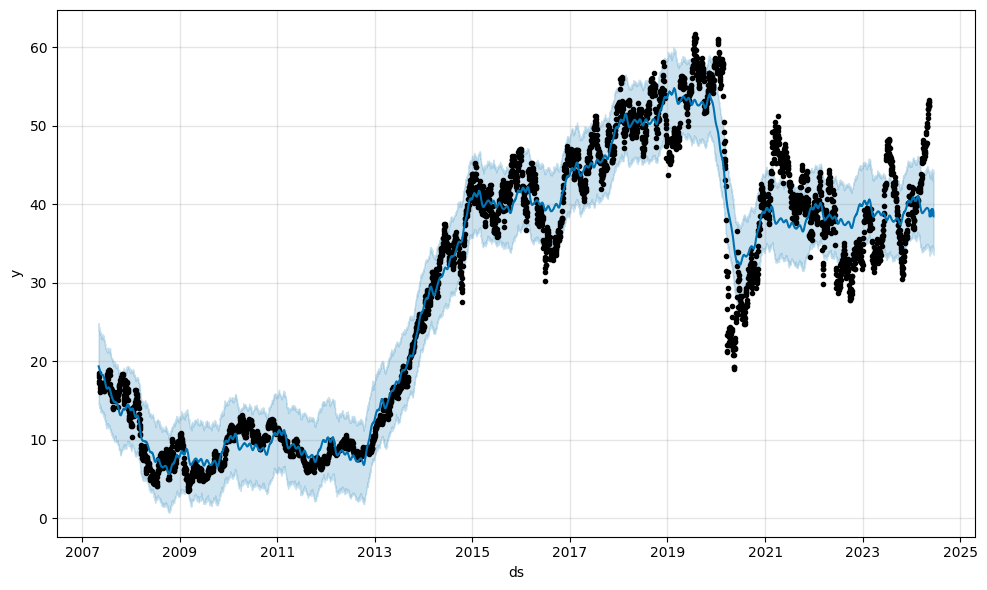

In [22]:
# visualize nvidia stock price for the next 1 year
nvda_forecast = make_forecast('DAL', periods=30)

#### Predict a KKR real estate trust price

In [18]:
# forecast the kkr real estate finance trust for the next 180 days
# return the forecast table, do not visualize a chart
kkr_forecast = make_forecast('KREF', 180, return_forecast=True, display_chart=False)

# focus on the immedeately understandable columns of the forecast
kkr_forecast = kkr_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# convert those columns to layman's
kkr_forecast.columns = ['Date', 'Predicted Price', 'Lower Bound Predicted', 'Upper Bound Predicted']

# display the last 10 days of the table
kkr_forecast.tail(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/_ly7tyk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/_acpp30h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13680', 'data', 'file=/tmp/tmp2q5op9mv/_ly7tyk0.json', 'init=/tmp/tmp2q5op9mv/_acpp30h.json', 'output', 'file=/tmp/tmp2q5op9mv/prophet_model4iprhayi/prophet_model-20240516235739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,Date,Predicted Price,Lower Bound Predicted,Upper Bound Predicted
1940,2024-11-03 04:00:00,10.578425,9.463848,11.699459
1941,2024-11-04 04:00:00,9.639086,8.442722,10.870757
1942,2024-11-05 04:00:00,9.636035,8.556399,10.772455
1943,2024-11-06 04:00:00,9.633586,8.488997,10.887873
1944,2024-11-07 04:00:00,9.626816,8.405421,10.784227
1945,2024-11-08 04:00:00,9.642507,8.458906,10.796208
1946,2024-11-09 04:00:00,9.980146,8.839569,11.228649
1947,2024-11-10 04:00:00,10.605062,9.457445,11.833356
1948,2024-11-11 04:00:00,9.666257,8.480502,10.849510
1949,2024-11-12 04:00:00,9.663207,8.491903,10.879415


#### Predict Bitcoin Price

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/q4ndua7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q5op9mv/dp1nxyp3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29021', 'data', 'file=/tmp/tmp2q5op9mv/q4ndua7d.json', 'init=/tmp/tmp2q5op9mv/dp1nxyp3.json', 'output', 'file=/tmp/tmp2q5op9mv/prophet_model101kj0jp/prophet_model-20240516235742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


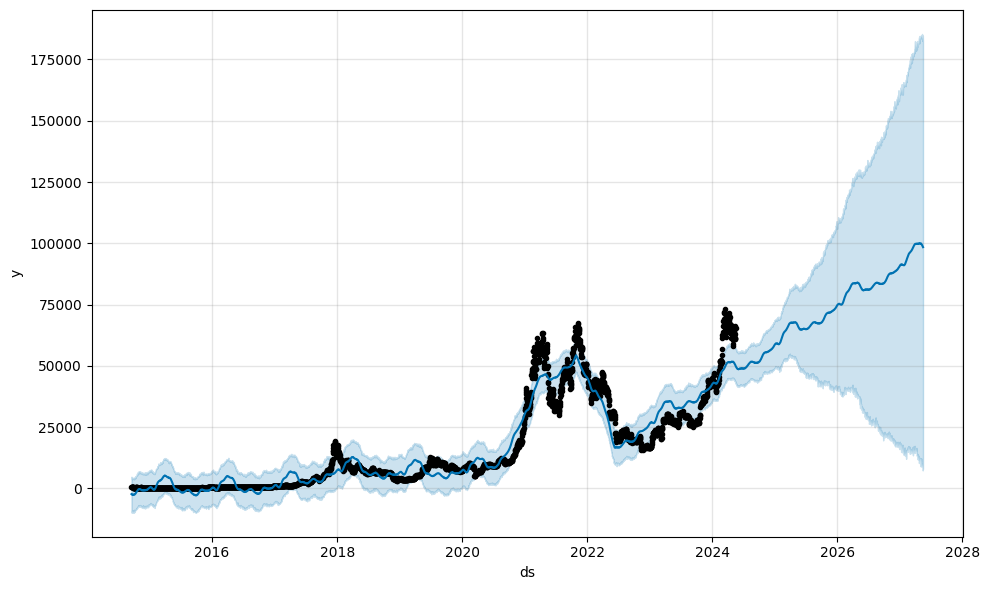

In [19]:
# set variable for number of years to predict
n_years = 3
n_days = n_years * 365

# forecast Bitcoin for that amount of time
btc_forecast = make_forecast('BTC-USD', n_days)

# display the forecasted price of Bitcoin
btc_forecast